Name: Kritika Pathak
<br>



## 1. Combined Cycle Power Plant Data Set

### (a) Download Data

Package imports

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 
import sklearn.metrics as metric
from sklearn.preprocessing import PolynomialFeatures
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

Get the Cycle Power Plant Data Set

In [2]:
#df=pd.read_excel('Folds5x2_pp.xlsx')
df=pd.read_excel('data/Folds5x2_pp.xlsx')

In [3]:
df.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


### (b) Exploring the data

#### i. rows and columns

In [4]:
df.columns

Index(['AT', 'V', 'AP', 'RH', 'PE'], dtype='object')

In [5]:
df.shape

(9568, 5)

## ii. pairwise scatterplots of all the variables

#### Scatter Plot of AT with all variables

<AxesSubplot:xlabel='AT', ylabel='PE'>

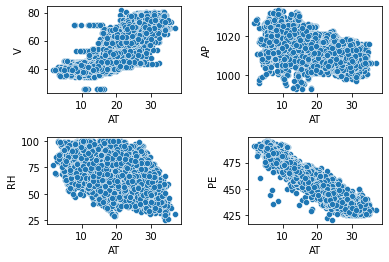

In [6]:
fig, axes = plt.subplots(2, 2)
fig.subplots_adjust(hspace=0.5, wspace=0.5)

#Scatter plot of AT with each variable
sns.scatterplot(data=df, x='AT', y='V', ax=axes[0,0])
sns.scatterplot(data=df, x='AT', y='AP', ax=axes[0,1])
sns.scatterplot(data=df, x='AT', y='RH', ax=axes[1,0])
sns.scatterplot(data=df, x='AT', y='PE', ax=axes[1,1])

#### Scatter Plot of V with all variables

<AxesSubplot:xlabel='V', ylabel='PE'>

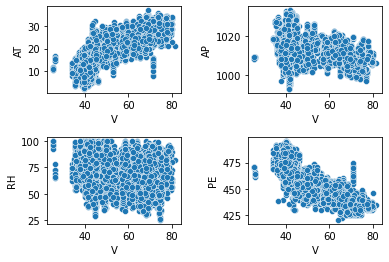

In [7]:
fig, axes = plt.subplots(2, 2)
fig.subplots_adjust(hspace=0.5, wspace=0.5)

#Scatter plot of AT with each variable
sns.scatterplot(data=df, x='V', y='AT', ax=axes[0,0])
sns.scatterplot(data=df, x='V', y='AP', ax=axes[0,1])
sns.scatterplot(data=df, x='V', y='RH', ax=axes[1,0])
sns.scatterplot(data=df, x='V', y='PE', ax=axes[1,1])

#### Scatter Plot of AP with all variables

<AxesSubplot:xlabel='AP', ylabel='PE'>

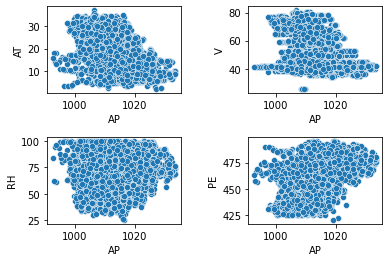

In [8]:
fig, axes = plt.subplots(2, 2)
fig.subplots_adjust(hspace=0.5, wspace=0.5)

#Scatter plot of AT with each variable
sns.scatterplot(data=df, x='AP', y='AT', ax=axes[0,0])
sns.scatterplot(data=df, x='AP', y='V', ax=axes[0,1])
sns.scatterplot(data=df, x='AP', y='RH', ax=axes[1,0])
sns.scatterplot(data=df, x='AP', y='PE', ax=axes[1,1])

#### Scatter Plot of RH with all variables

<AxesSubplot:xlabel='RH', ylabel='PE'>

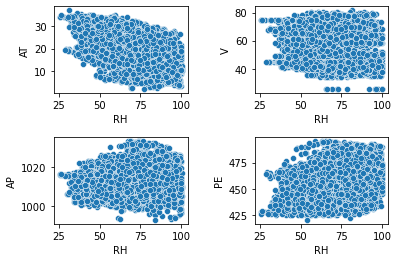

In [9]:
fig, axes = plt.subplots(2, 2)
fig.subplots_adjust(hspace=0.5, wspace=0.5)

#Scatter plot of AT with each variable
sns.scatterplot(data=df, x='RH', y='AT', ax=axes[0,0])
sns.scatterplot(data=df, x='RH', y='V', ax=axes[0,1])
sns.scatterplot(data=df, x='RH', y='AP', ax=axes[1,0])
sns.scatterplot(data=df, x='RH', y='PE', ax=axes[1,1])

#### Scatter Plot of PE with all variables

<AxesSubplot:xlabel='PE', ylabel='RH'>

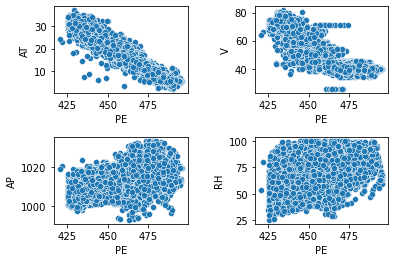

In [10]:
fig, axes = plt.subplots(2, 2)
fig.subplots_adjust(hspace=0.5, wspace=0.5)

#Scatter plot of AT with each variable
sns.scatterplot(data=df, x='PE', y='AT', ax=axes[0,0])
sns.scatterplot(data=df, x='PE', y='V', ax=axes[0,1])
sns.scatterplot(data=df, x='PE', y='AP', ax=axes[1,0])
sns.scatterplot(data=df, x='PE', y='RH', ax=axes[1,1])

#### iii. mean, the median, range, first and third quartiles, and interquartile ranges

In [11]:
df2=df.describe()
df2

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


### (c) Simple Linear Regression

#### USING EACH VARIABLE AS PREDICTOR SEPERATELY

In [12]:
X = df[['AT', 'V','AP', 'RH']]
Y=df['PE']

AT 

Coefficient: [-2.17131996] 

V 

Coefficient: [-1.16813513] 

AP 

Coefficient: [1.48987167] 

RH 

Coefficient: [0.4556501] 



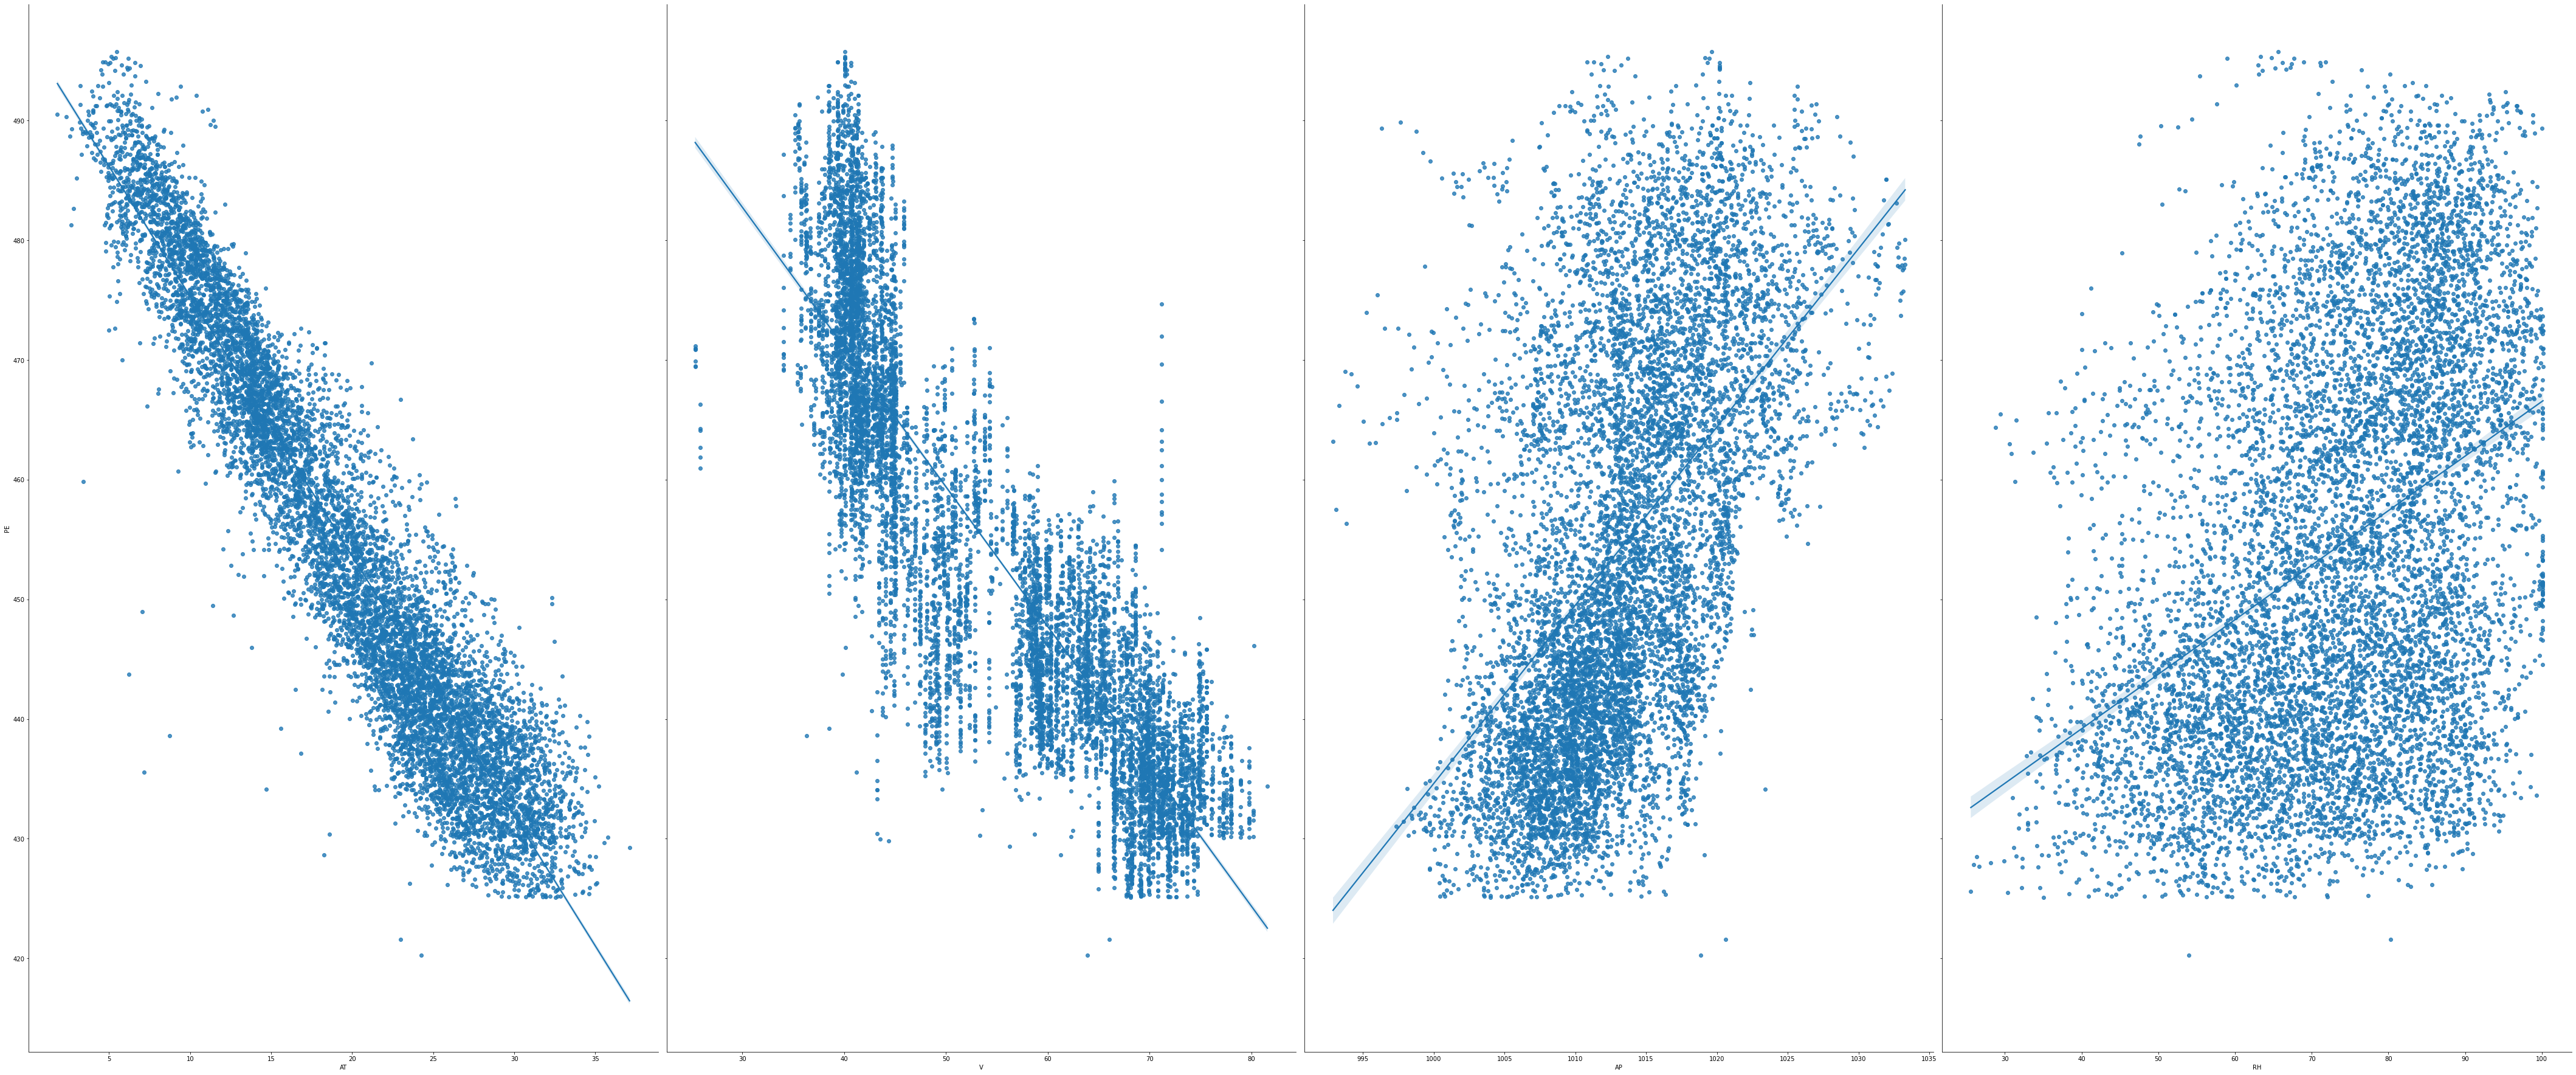

In [13]:
import statsmodels.api as sm
a = ['AT', 'V', 'AP', 'RH']

lm1 = LinearRegression()
train = df['PE']
for w in a:     
    m_all_predictors = lm1.fit(df[[w]], train)
    print(w,'\n')
    print('Coefficient:',lm1.coef_,'\n')
    
    
z=sns.pairplot(data=df, x_vars=['AT','V','AP', 'RH'], y_vars='PE', size=25, aspect=0.6, kind='reg')

z

### (d) Multiple Regression

In [14]:

X2 = df[['AT', 'V', 'AP', 'RH']]
Y2 = df['PE']
lm3 = LinearRegression()
model2 = lm3.fit(X2, Y2)
print('Score is:\n',model2.score(X2,Y2),'\n')
print('Intercept:\n',lm3.intercept_,'\n')
print('Coefficients:\n', lm3.coef_,'\n')

model2 = sm.OLS(Y2, X2).fit()
print(model2.summary())
print(' ')
print(' ')
print('For predictors we can reject the null hypothesis H0:βj =0.')

Score is:
 0.9286960898122536 

Intercept:
 454.60927431530956 

Coefficients:
 [-1.97751311 -0.23391642  0.06208294 -0.1580541 ] 

                                 OLS Regression Results                                
Dep. Variable:                     PE   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          1.939e+07
Date:                Tue, 21 May 2024   Prob (F-statistic):                        0.00
Time:                        12:32:20   Log-Likelihood:                         -29068.
No. Observations:                9568   AIC:                                  5.814e+04
Df Residuals:                    9564   BIC:                                  5.817e+04
Df Model:                           4                                                  
Covariance Type:            nonrobust                                       

### (e) Nonlinear Association

AT
Intercepts:
 [492.72814334] 

Coefficients:
 [[-0.61034571 -0.12513818  0.00267485]] 

****************


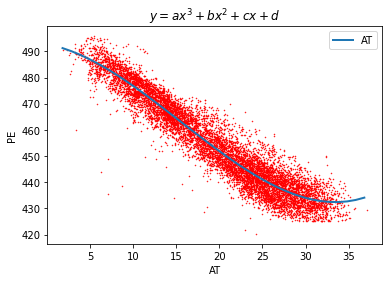

V
Intercepts:
 [554.14684906] 

Coefficients:
 [[-2.14437732e+00 -2.71228490e-03  1.34357110e-04]] 

****************


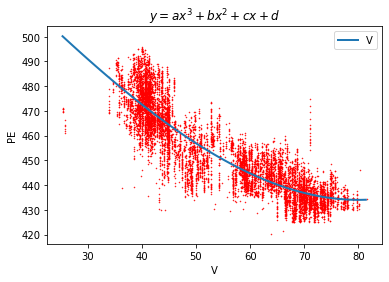

AP
Intercepts:
 [5236219.81053276] 

Coefficients:
 [[-1.54608657e+04  1.52162521e+01 -4.99115979e-03]] 

****************


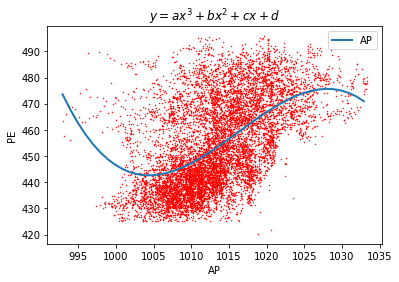

RH
Intercepts:
 [468.41353597] 

Coefficients:
 [[-1.72921131e+00  3.21451721e-02 -1.52187969e-04]] 

****************


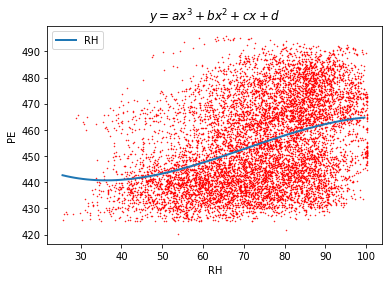

In [15]:
X = ['AT', 'V', 'AP', 'RH']

# Reshapping all the values
for a in X:
    x = df[a].values
    x = x.reshape(-1, 1)
    y = df['PE'].values
    y = y.reshape(-1, 1)
    
    lm4 = LinearRegression()

    #Giving a polynomial degree of 3
    mo = PolynomialFeatures(degree = 3, include_bias=False)
    X_quad = mo.fit_transform(x)
    lm4.fit(X_quad, y)
    

    #Printing the intercepts and Coefficients
    print(a)
    print('Intercepts:\n',lm4.intercept_,'\n')
    print('Coefficients:\n',lm4.coef_,'\n')
    print("****************")
    
    X_fit = np.arange(df[a].min(), df[a].max(), 1).reshape(-1, 1)
    pred_y= lm4.predict(mo.fit_transform(X_fit))
    
    #Plotting the equation
    plt.title('$y = ax^3 + bx^2 + cx + d$')
    plt.plot(x, y, 'r.',markersize = 1)
    plt.plot(X_fit, pred_y,label=a, lw= 2)

    # Labelling the plots
    plt.xlabel(a)
    plt.ylabel('PE')
    plt.legend()
    plt.show()
    
    # Dont forget to put r square


### (f) Model Testing

In [16]:
X = df[['AT', 'V','AP', 'RH']]
Y=df['PE']

                                 OLS Regression Results                                
Dep. Variable:                     PE   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          7.461e+06
Date:                Tue, 21 May 2024   Prob (F-statistic):                        0.00
Time:                        12:32:22   Log-Likelihood:                         -19283.
No. Observations:                6697   AIC:                                  3.859e+04
Df Residuals:                    6687   BIC:                                  3.865e+04
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

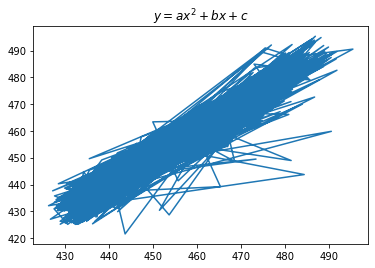

In [17]:
# Splitting the test and train data
#Taking 70% as train and 30% test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size = 0.3, random_state = 101)

#Now again creating polynomial feature with interaction_only as true
poly_feature1= PolynomialFeatures(interaction_only=True,include_bias=False, degree=2)

# Transformitting the values
x2 = poly_feature1.fit_transform(X_train)
x3 = poly_feature1.transform(X_test)
model2 = sm.OLS(Y_train, x2).fit()
ypred = model2.predict(x3) 
print(model2.summary())

#Plotting the equation
plt.title('$y = ax^2 + bx + c$')
plt.plot(ypred, Y_test)

### (i) KNN

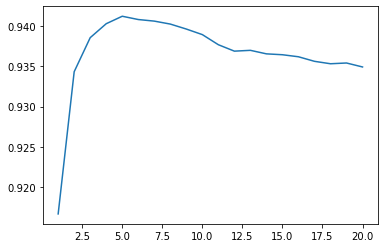

In [18]:
# Finding best K

k_score = []

for k in range(1, 21):
    knn = KNeighborsRegressor(n_neighbors=k, p=2)
    
    # Fitting data and predictiong it and ten incrementing the value of k
    knn.fit(X_train, Y_train)
    pred = knn.predict(X_test)
    
    k_score.append(metric.r2_score(Y_test, pred))
    
plt.plot(np.arange(1, 21, 1), k_score)

### (j ) Compare KNN and Linear

In [19]:
KNN = df[['AT', 'V', 'AP', 'RH', 'PE']]

x_train = KNN[['AT', 'V', 'AP', 'RH']]
y_train = KNN[['PE']]

# KNN 
k = 6

# The best k obtained above is 6
knn = KNeighborsRegressor(n_neighbors = k, p = 2)
knn.fit(x_train,y_train)
knnpredict = knn.predict(x_train)

# Calculating r2 square using sklearn.metrics
score = metric.r2_score(y_train, knnpredict)

print('R square of KNN is:', score)

R square of KNN is: 0.9639013744038657


In [20]:
#Linear Regression
lm5 = LinearRegression()
model5 = lm5.fit(x_train, y_train)
predict = model5.predict(x_train)

# Calculating r2 square using sklearn.metrics
score = metric.r2_score(y_train,predict)

print('R square of Linear regression is: ', score)


R square of Linear regression is:  0.9286960898122536


In [21]:
#Comparing both
print('As R square of KNN is greater than Linear Regression, KNN is better.')

As R square of KNN is greater than Linear Regression, KNN is better.


# THE END!